Who Survived the Titanic?

For this assignment, we will analyze the open dataset with real data on the passengers aboard the Titanic.

Download the data from Kaggle website: https://www.kaggle.com/c/titanic/data, file “train.csv”. The definition of all variables can be found on the same page, in the Data Dictionary section.

Read the data from the file into pandas dataframe. Analyze, clean and transform the data to answer the following question:

What categories of passengers were most likely to survive the Titanic disaster?
You might include the following attributes in your analysis:

Passenger age,
Passenger gender,
Cabin class the passenger traveled in (variable ‘ticket class’).
What other attributes did you use for the analysis? Explain how you used them.Provide a complete list of all attributes used.

Did you engineer any attributes? If yes, explain the rationale and how the new attributes were used in the analysis?

If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

How did you treat missing values? Provide the detailed explanation in the comments.

Submit Jupyter Notebook with your solution via BlackBoard prior to the class on March 9, 2018.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv("train.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

### Exploratory Data Analysis

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
## check for null values
null_columns=df.columns[df.isnull().any()]

## print totals of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
## taking value counts for survivors but grouped by Sex
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
## checking survival rates based on gender using pivot table

df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
## taking value counts for survivors grouped by Passenger Class

df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
#checking survival rates based on Passenger Class using pivot tables

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
## taking value counts for survivors grouped by no. of accompanying siblings

df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [25]:
## checking survival rates based on number of accompanying family members using pivot tables

df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
## taking value counts for survivors grouped by parent/child accompaniment

df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [27]:
## checking survival rates based on number of parent/child  using pivot tables

df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Attributes Used for Analysis

<li>Gender
<li>Passenger Class
<li>Accompanying Siblings/Spouses
<li>Children Accompanied by Parents

I did want to try using age and fare price, but I'm still not able to correctly use continuous variables in analysis. I think the passenger class is as good an indicator as fare price, in this instance, since it's likely that people who paid higher fares were also likely to be in the higher passenger classes. this bears out, since most of the survivors in my analysis are from first class.

In the same vein, with age, it's likely that children would be accompanied and so it's safe to assume they make up the bulk of the families in the SibSp category. Since no single people survived, it's fair to say that those that did survive from that category were more likely to be younger, or women, based on the results from the "Age" analysis.

## Filling in Missing Values for Age

I don't want to drop NaN ages to avoid losing important values. I don't want to create a new category for NaNs because this is a continuous variable. I decided to use the filling in missing values because it allows me to keep them in the data set.

In [34]:
## Find the average age first

AvgAge = df.Age.mean()

In [35]:
df.Age = df.Age.fillna(value=AvgAge)

In [36]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Visualizations

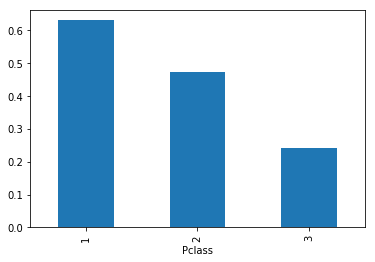

In [39]:
## survivors by passenger class
df.groupby('Pclass').Survived.mean().plot(kind='bar')

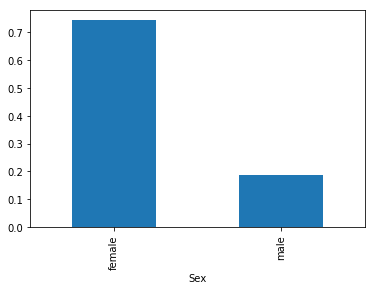

In [40]:
## survivors by gender
df.groupby('Sex').Survived.mean().plot(kind='bar')

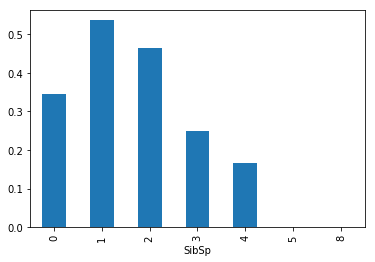

In [41]:
## survivors by accompanying family
df.groupby('SibSp').Survived.mean().plot(kind='bar')

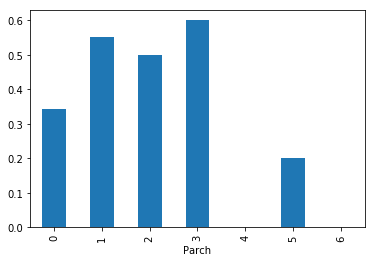

In [42]:
## survivors by passenger class
df.groupby('Parch').Survived.mean().plot(kind='bar')